In [1]:
import matplotlib.pyplot as plt
import numpy as np
%load_ext autoreload
%autoreload 2

# Loading data from train.csv and remove aberant colomns

In [3]:
from proj1_helpers import load_csv_data, standardize, build_model_data

yb, input_data, ids = load_csv_data("../train.csv")
x, mean_x, std_x = standardize(input_data)
y, tx = build_model_data(x, yb)

# Optimize the hyperparameters

In [4]:
max_iters = 100
Dim = tx.shape[1]
initial_w = np.zeros(Dim)

In [5]:
import tuning_plotting as tp

best_gamma_gd=tp.best_gamma_selection_gd(y, tx, max_iters)
best_gamma_sgd=tp.best_gamma_selection_sgd(y, tx, max_iters)
best_gamma_log=tp.best_gamma_selection(y, tx, max_iters)

best_lambda_ridge=tp.best_lambda_selection_ridge(y, tx, max_iters)
best_lambda_lg=tp.best_lambda_selection_logistic(y, tx, max_iters, best_gamma_log) #assume similar gammas

Best gamma = 0.01, training_loss = 0.3646066799260904, test_loss = 0.36591018945808057
Best gamma = 1.5848931924611143e-08, training_loss = 0.45479348394849256, test_loss = 0.4491503816454452
Best gamma = 0.01, training_loss = -0.2892873015387077, test_loss = -0.2812119570689253
Best lambda = 1e-08, training_loss = 0.34008618217151904, test_loss = 0.34008618217151904
Best lambda = 0.01, training_loss = -5.89647264818179, test_loss = -5.89647264818179


## Apply models and compare

In [6]:
from proj1_helpers import compare_result, predict_labels
import implementations as impl

In [7]:
gd_w, gd_losses = impl.mean_squared_error_gd(y, tx, initial_w, max_iters, best_gamma_gd)
y_gd = predict_labels(gd_w, tx)
print(best_gamma_gd)
ratio = compare_result(y_gd, y)
print("percent of good results :", ratio*100, "%")

0.01
percent of good results : 72.4768 %


In [8]:
sgd_w, sgd_losses = impl.mean_squared_error_sgd(y, tx, initial_w, max_iters, best_gamma_sgd)
y_sgd = predict_labels(sgd_w, tx)

ratio = compare_result(y_sgd, y)
print("percent of good results :", ratio*100, "%")

percent of good results : 70.9352 %


In [9]:
ridge_w, ridge_losses = impl.ridge_regression(y, tx, best_lambda_ridge)
y_ridge = predict_labels(ridge_w, tx)

ratio = compare_result(y_ridge, y)
print("percent of good results :", ratio*100, "%")

percent of good results : 74.4648 %


In [10]:
log_w, log_losses = impl.logistic_regression(y, tx, initial_w, max_iters, best_gamma_log)
y_log = predict_labels(log_w, tx)

ratio = compare_result(y_log, y)
print("percent of good results :", ratio*100, "%")

percent of good results : 71.782 %


In [11]:
lg_w, lg_losses = impl.reg_logistic_regression(y, tx, best_lambda_lg, initial_w, max_iters, best_gamma_log)
y_lg = predict_labels(lg_w, tx)

ratio = compare_result(y_lg, y)
print("percent of good results :", ratio*100, "%")

percent of good results : 71.544 %


In [12]:
ls_w, ls_losses = impl.least_squares(y, tx)
y_ls = predict_labels(ls_w, tx)

ratio = compare_result(y_ls, y)
print("percent of good results :", ratio*100, "%")

percent of good results : 74.46000000000001 %


# Plots

In [24]:
import tuning_plotting as tp

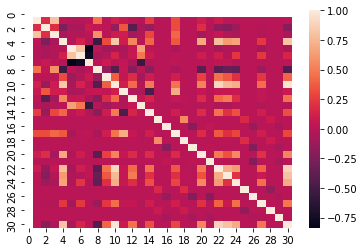

In [18]:
tp.heatmap_corrolation(tx)

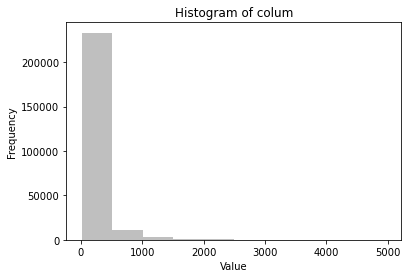

In [22]:
# tp.boxplot_outlier_three(input_data, see_c1=1, see_c2=2, see_c3=10)
tp.plot_histogram(input_data, col=5)

# Use model obtained with train.csv with test.csv 

In [19]:
from proj1_helpers import load_csv_data, standardize, build_model_data

yb, data, ids = load_csv_data("../test.csv")
x, mean_x, std_x = standardize(data)
y, tx = build_model_data(x, yb)

## create submission

In [20]:
from proj1_helpers import predict_labels, create_csv_submission

In [ ]:
# gradient descent
y_model = predict_labels(gd_w, tx)
create_csv_submission(ids, y_model, "CSV_gradient_descent.csv")

In [ ]:
# SGD
y_model = predict_labels(sgd_w, tx)
create_csv_submission(ids, y_model, "CSV_SGD.csv")

In [ ]:
# least squares
y_model = predict_labels(ls_w, tx)
create_csv_submission(ids, y_model, "CSV_least_squares.csv")

In [13]:
# ridge
y_model = predict_labels(ridge_w, tx)
create_csv_submission(ids, y_model, "CSV_ridge_regression.csv")

In [13]:
# logistic regression
y_model = predict_labels(log_w, tx)
create_csv_submission(ids, y_model, "CSV_logistic_regression.csv")

In [21]:
# reg logistic
y_model = predict_labels(lg_w, tx)
create_csv_submission(ids, y_model, "CSV_reg_logistic_regression.csv")